<a href="https://colab.research.google.com/github/Aditya218-maker/BankMarketingDataset/blob/main/BANK_full_Classificationprojectipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **GitHub Link -**

https://github.com/Aditya218-maker/BankMarketingDataset.git

# **Problem Statement**


To build a machine learning model that predicts whether a customer will subscribe to a term deposit based on their personal and campaign-related features, enabling banks to optimize marketing efforts and reduce customer acquisition costs.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [3]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/data/Copy of bank-full.csv', delimiter=';')

Mounted at /content/drive


### Dataset First View

In [4]:
# Dataset First Look
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(45211, 17)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")

Total duplicate rows: 0


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
missing_values = df.isnull().sum()
print(missing_values)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


### What did you know about your dataset?

1.This dataset was collected from a Portuguese bank's marketing campaign.

2.y --> This is the target column (last column). yes --> client subscribed ;no-->client did not

3.There are 45211 rows and 17 columns in this dataset.

4.There are no missing or null values in this dataset.



## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [10]:
# Dataset Describe
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Variables Description

| Column        | Description                                                      |
| ------------- | ---------------------------------------------------------------- |
| `age`         | Age of the client                                                |
| `job`         | Type of job (e.g., admin., technician, blue-collar)              |
| `marital`     | Marital status (married, single, divorced)                       |
| `education`   | Education level                                                  |
| `default`     | Has credit in default? (yes/no)                                  |
| `balance`     | Average yearly balance in euros                                  |
| `housing`     | Has a housing loan? (yes/no)                                     |
| `loan`        | Has a personal loan? (yes/no)                                    |
| `contact`     | Contact communication type (cellular, telephone)                 |
| `day`         | Last contact day of the month                                    |
| `month`       | Last contact month of the year                                   |
| `duration`    | Last contact duration in seconds **(very important for target)** |
| `campaign`    | Number of contacts performed during this campaign                |
| `pdays`       | Days since the client was last contacted (999 means never)       |
| `previous`    | Number of contacts performed before this campaign                |
| `poutcome`    | Outcome of the previous marketing campaign                       |
| `y` (or `y.`) | **Target**: Whether the client subscribed to a term deposit      |


### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
unique_values = df.nunique()
print(unique_values)

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.
#mapped yes to 1 and no to 0
binary_map = {'yes': 1, 'no': 0}
for col in ['default', 'housing', 'loan', 'y']:
    df[col] = df[col].map(binary_map)

### What all manipulations have you done and insights you found?

I have converted binary columns(yes/no) to Numeric(1/0 respectively) because Machine learning models need numeric inputs. yes/no text needs to be converted for models to understand patterns.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

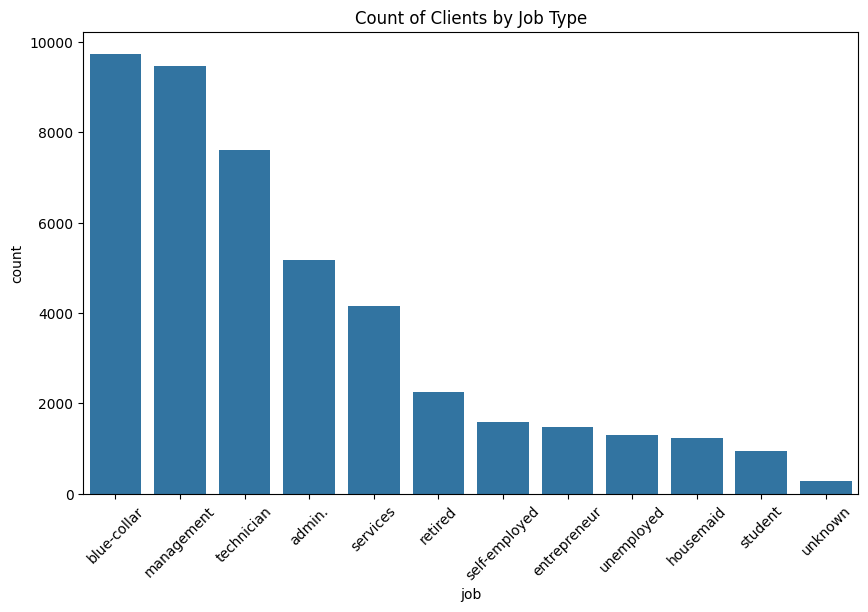

In [13]:
# Chart - 1 Job Distribution (Count Plot)
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='job', order=df['job'].value_counts().index)
plt.title('Count of Clients by Job Type')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

To see how client jobs are distributed and identify dominant job categories that might affect subscription.

##### 2. What is/are the insight(s) found from the chart?

1.Top Job Categories:

Blue-collar, management, and technician jobs have the highest number of clients.

2.Mid-Level Categories:

Admin, services, and retired groups show moderate client counts.

3.Low Representation Categories:

Self-employed, entrepreneur, unemployed, housemaid, student, and unknown categories have the lowest number of clients.

4.Missing/Incomplete Data:

The unknown category suggests missing job data in the dataset.





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

1.Target High-Volume Segments:

Focusing on blue-collar, management, and technician roles can lead to higher subscription conversions due to larger client bases.

2.Efficient Resource Allocation:

Prioritizing high and mid-tier segments ensures better ROI on marketing and outreach efforts.

3.Product Personalization:

Categories like retired may respond well to specific products like pensions or savings plans, enabling niche targeting.

Negative Growth Impact:

1.Low Engagement Segments:

Investing marketing efforts in students, housemaids, or unknown groups may yield low returns due to smaller or unclear client bases.

2.Data Quality Issues:

The presence of the unknown job category may reduce the accuracy of predictive models and affect personalized marketing strategies.




#### Chart - 2

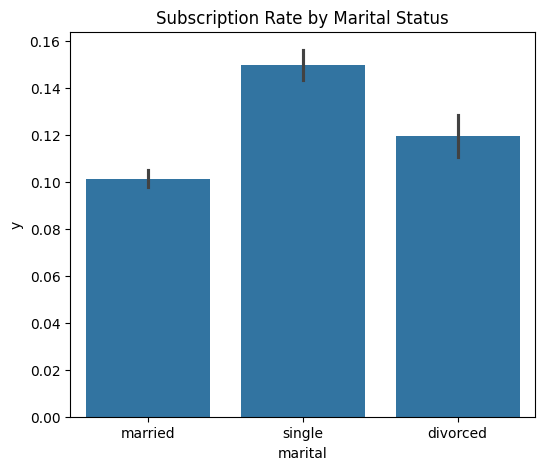

In [14]:
# Chart - 2 Subscription Rate by Marital Status (Bar Plot)
plt.figure(figsize=(6,5))
sns.barplot(x='marital', y='y', data=df)
plt.title('Subscription Rate by Marital Status')
plt.show()

##### 1. Why did you pick the specific chart?

To explore how marital status influences the likelihood of a client subscribing.

##### 2. What is/are the insight(s) found from the chart?

1.Singles have the highest subscription rate.

2.Divorced clients subscribe more than married ones.

3.Married clients have the lowest subscription rate.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

-->Positive Business Impact:
1.Target Singles First:

High response potential—ideal group for focused campaigns.

2.Leverage Divorced Group:

Moderate engagement, suitable for tailored offers.

-->Negative Growth Impact:

1.Low Conversion from Married Clients:

Wasting budget on this group may reduce marketing efficiency—needs re-evaluation or a different strategy.



#### Chart - 3

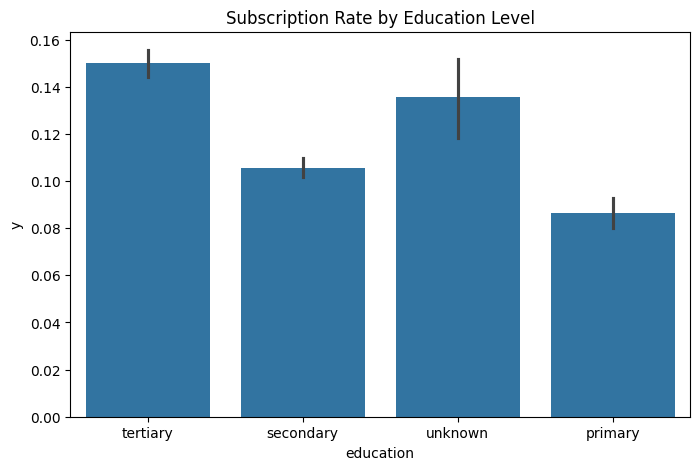

In [15]:
# Chart - 3 Education Level vs Subscription (Bar Plot)
plt.figure(figsize=(8,5))
sns.barplot(x='education', y='y', data=df)
plt.title('Subscription Rate by Education Level')
plt.show()

##### 1. Why did you pick the specific chart?

To check if higher education levels are associated with higher subscription rates.

##### 2. What is/are the insight(s) found from the chart?

1.Tertiary (higher) education group has the highest subscription rate.

2.Secondary and primary education groups show lower subscription rates.

3.Clients with unknown education levels still show moderate subscription.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

-->Positive Business Impact:

1.Prioritize Tertiary-Educated Clients:

Likely more responsive to financial offers—strong target segment.

2.Use Education-Based Segmentation:

Helps personalize product communication (e.g., more technical info for tertiary).

-->Negative Growth Impact:

1.Primary & Secondary Groups May Need Different Tactics:

Generic marketing may not convert well—risks wasted efforts.

2.Unknown Category Affects Precision:

Missing data limits effective targeting—data quality improvements needed.



#### Chart - 4

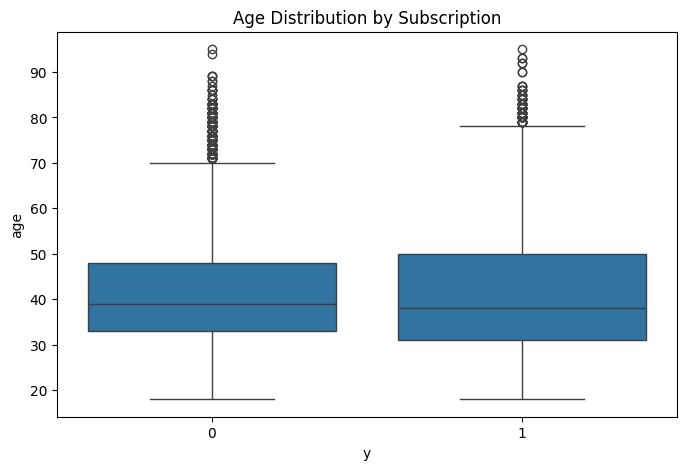

In [16]:
# Chart - 4 Age Distribution by Subscription (Box Plot)
plt.figure(figsize=(8,5))
sns.boxplot(x='y', y='age', data=df)
plt.title('Age Distribution by Subscription')
plt.show()

##### 1. Why did you pick the specific chart?

To examine if there’s a noticeable age trend between those who subscribe vs. don’t.

##### 2. What is/are the insight(s) found from the chart?

1.Subscribers tend to be slightly older on average than non-subscribers.

2.Wider age range among those who subscribe, including more clients above 60.

3.Outliers exist in both groups, but more concentrated in the "no" category.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

-->Positive Business Impact:

1.Target Older Age Groups: Higher likelihood of subscription—can design age-specific campaigns (e.g., retirement savings, investments).

2.Wider Age Reach:

Subscription isn’t limited to one age cluster—flexibility in marketing.

-->Negative Growth Impact:

1.Overlooking Younger Clients:

Focusing only on older age groups might ignore future potential markets—requires balance.

2.Outliers Can Skew Strategy:

High-age outliers may mislead trends—filtering or separate analysis recommended.

#### Chart - 5

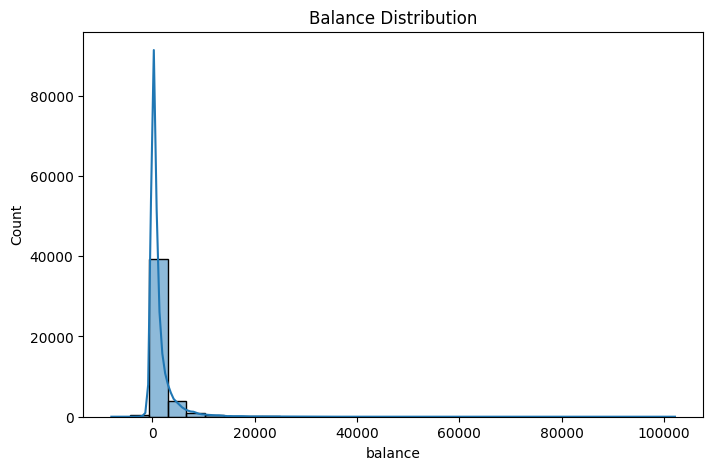

In [17]:
# Chart - 5 Balance Distribution (Histogram)
plt.figure(figsize=(8,5))
sns.histplot(df['balance'], kde=True, bins=30)
plt.title('Balance Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

To analyze the spread of client balances and check for skewness or outliers.

##### 2. What is/are the insight(s) found from the chart?

1.Highly right-skewed distribution — most clients have low or zero balance.

2.Few clients have very high balances, creating long tails and outliers.

3.Peak is centered around zero, indicating many low-balance clients.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

-->Positive Business Impact:

1.Segment High-Balance Clients:

Outliers can be targeted with premium or investment products.

2.Design Basic Plans for Low-Balance Clients:

Large volume makes them suitable for cost-effective mass offerings.

-->Negative Growth Impact:

1.Skewed Data Can Mislead Averages:

Strategy based on mean balance might ignore real client behavior—median is more reliable.

2.Outliers May Distort Models:

Without handling, extreme balances can reduce model accuracy or overfit predictions.



#### Chart - 6

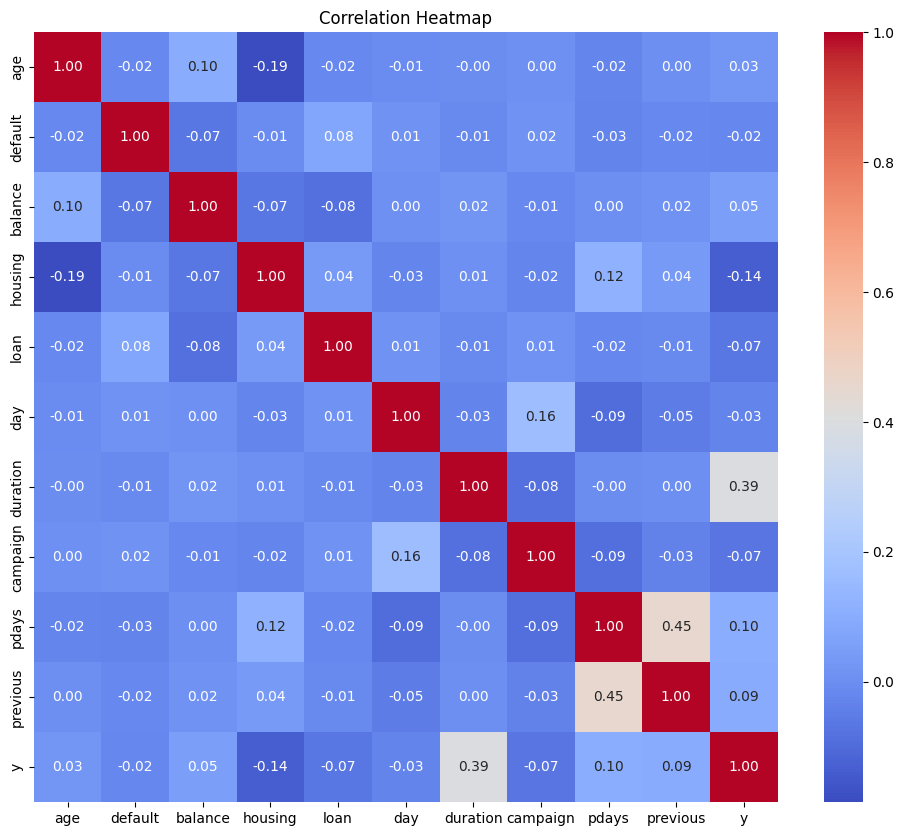

In [18]:
# Chart - 6 Correlation Heatmap
plt.figure(figsize=(12,10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

To identify which numerical features are most strongly correlated with each other and with the target.

##### 2. What is/are the insight(s) found from the chart?

1.No strong correlations among most features — values are close to 0.

2.Highest correlation: pdays and previous (0.45), indicating past contact history is moderately related.

3.Other features like age, balance, and duration are weakly correlated with one another.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

-->Positive Business Impact:

1.Low multicollinearity:

Ideal for building reliable predictive models—features add independent value.

2.Use pdays & previous together for behavioral targeting (follow-up marketing based on contact history).

-->Negative Growth Impact:

1.Weak correlations imply limited predictive power individually—need feature engineering or combined variables.

2.Overreliance on any single feature (e.g., balance) won’t significantly improve model performance.

#### Chart - 7

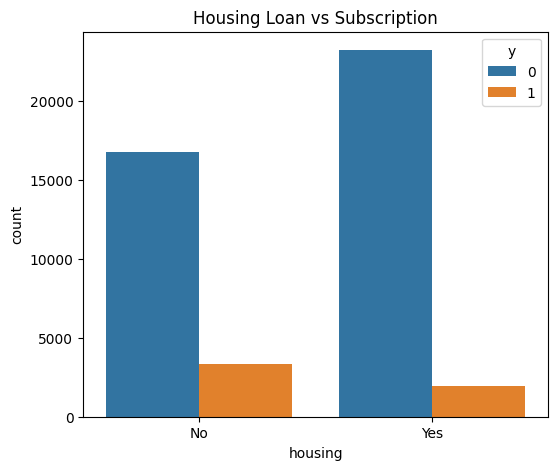

In [19]:
# Chart - 7 Housing Loan vs Subscription (Count Plot)
plt.figure(figsize=(6,5))
sns.countplot(x='housing', hue='y', data=df)
plt.title('Housing Loan vs Subscription')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

##### 1. Why did you pick the specific chart?

To investigate whether having a housing loan impacts subscription behavior.

##### 2. What is/are the insight(s) found from the chart?

1.Clients without housing loans have a slightly lower subscription count, but they are more in number overall.

2.Clients with housing loans have fewer total clients, but a higher proportion subscribe.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

-->Positive Business Impact:

1.Target Housing Loan Holders:

They show a higher tendency to subscribe—promising segment for cross-selling.

2.Personalized Financial Products:

Housing loan clients might be more open to bundled offers (e.g., insurance, savings plans).

-->Negative Growth Impact:

Broad targeting of non-loan clients may dilute ROI, since their subscription ratio is lower—target more selectively.



#### Chart - 8

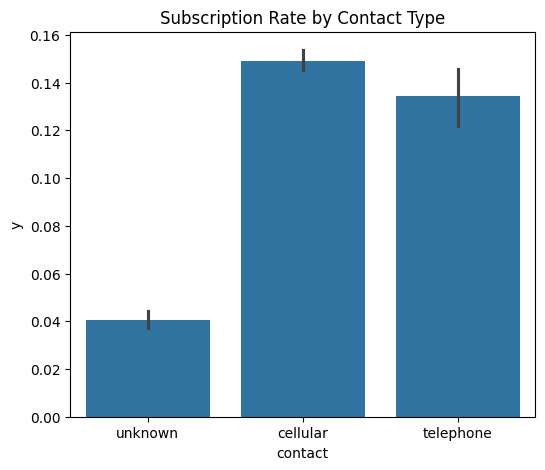

In [20]:
# Chart - 8 Contact Type vs Subscription Rate (Bar Plot)
plt.figure(figsize=(6,5))
sns.barplot(x='contact', y='y', data=df)
plt.title('Subscription Rate by Contact Type')
plt.show()

##### 1. Why did you pick the specific chart?

To find out which contact method (cellular/telephone) is more effective for client conversions.

##### 2. What is/are the insight(s) found from the chart?

1.Cellular contact yields the highest subscription rate among all contact types.

2.Telephone contact has a lower conversion rate than cellular.

3.Unknown contact type performs the worst, suggesting lack of meaningful engagement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

-->Positive Business Impact:

1.Prioritize Cellular Contact:

Most effective method for client conversion—should be the default outreach channel.

2.Improve Contact Strategy:

Optimizing contact methods boosts overall campaign efficiency and conversion.

-->Negative Growth Impact:

1.Using Telephone or Unknown Methods Reduces Success Rates:

Continuing with less effective channels wastes resources and lowers ROI.

#### Chart - 9

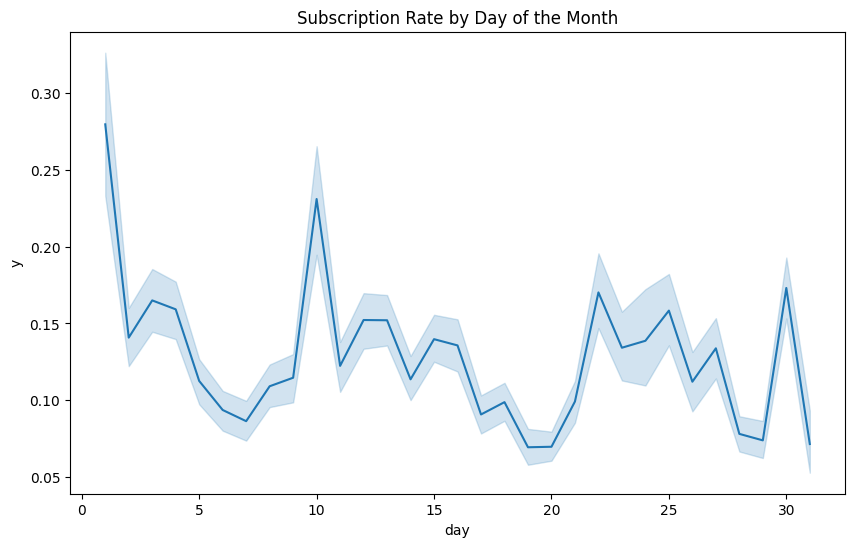

In [21]:
# Chart - 9 Day vs Subscription Rate (Line Plot)
plt.figure(figsize=(10,6))
sns.lineplot(x='day', y='y', data=df)
plt.title('Subscription Rate by Day of the Month')
plt.show()

##### 1. Why did you pick the specific chart?

To observe if the day of the month has any noticeable trend in successful subscriptions.

##### 2. What is/are the insight(s) found from the chart?

1.Subscription rate fluctuates throughout the month, with no consistent linear trend.

2.Notable dips around days 10 and 20, possibly due to timing or campaign fatigue.

3.Peaks observed near the start and end of the month, suggesting higher engagement.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

-->Positive Business Impact:

1.Optimize Campaign Timing:

Schedule key outreach near month-start and month-end for better results.

2.Avoid Low-Response Days:

Mid-month dips can inform when not to run intensive campaigns.

-->Negative Growth Impact:

1.Uniform Campaign Distribution May Hurt Performance:

Not aligning efforts with high-conversion days may reduce effectiveness.



#### Chart - 10

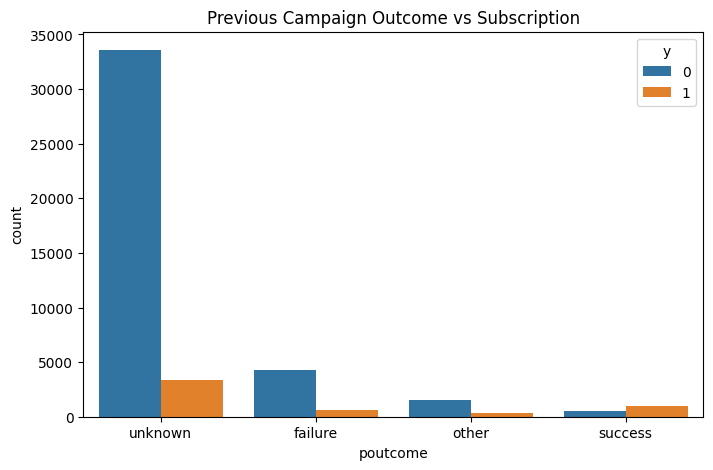

In [22]:
# Chart - 10 Previous Campaign Outcome vs Subscription (Count Plot)
plt.figure(figsize=(8,5))
sns.countplot(x='poutcome', hue='y', data=df)
plt.title('Previous Campaign Outcome vs Subscription')
plt.show()

##### 1. Why did you pick the specific chart?

To evaluate how past campaign success/failure impacts current campaign outcome.



##### 2. What is/are the insight(s) found from the chart?

1.Most contacts have "unknown" past campaign outcomes, meaning no record of interaction or it's the first contact.

2.Success in previous campaigns correlates with higher current subscriptions (the “success” category has a higher orange bar than other known outcomes).

3.Failures in past campaigns show a low conversion rate in the current campaign (low orange bar under “failure”).

4.“Unknown” outcomes still result in some subscriptions, suggesting potential among first-time contacts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

-->Positive Business Impacts:

1.High success rate from previous successes:

Targeting clients who responded positively before could lead to higher ROI.

Enables effective segmentation and personalization in marketing.

2.Opportunity in "unknown" group:

Indicates that new leads still convert, which means acquiring new customers is viable.

Broadens marketing reach — not fully dependent on historical success.

Actionable insights for campaign strategy:

Helps prioritize lead nurturing or retargeting strategies based on past behavior.

-->Negative Business Impacts:

1.High reliance on “unknown” category:

Indicates poor tracking/data quality — limits ability to analyze campaign performance trends.

May increase marketing inefficiencies and resource wastage.

2.Low success after failed past campaigns:

Repeated attempts on previously disinterested customers may lead to wasted marketing efforts.

May also indicate brand fatigue or poor message alignment.

3.Small base of "success" contacts:

If the number of previously successful contacts is small, scalability of this positive trend is limited.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [23]:
# Handling Missing Values & Missing Value Imputation
df.replace('unknown', np.nan, inplace=True)
# View missing value count
print(df.isnull().sum())
# Filled with mode (most frequent) for categorical
for col in ['job', 'education', 'contact', 'poutcome']:
    df[col].fillna(df[col].mode()[0], inplace=True)

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64


/tmp/ipython-input-23-3924015980.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


#### What all missing value imputation techniques have you used and why did you use those techniques?

 I used Mode Imputation (Most Frequent Value) because These columns are categorical and mode is a simple and effective imputation technique when:

 1.The missing values are non-numeric.

2.The feature’s distribution is not evenly spread (some categories are dominant).

And it helps maintain the natural frequency distribution of the feature and avoids introducing bias that may occur from rare categories.

### 2. Handling Outliers

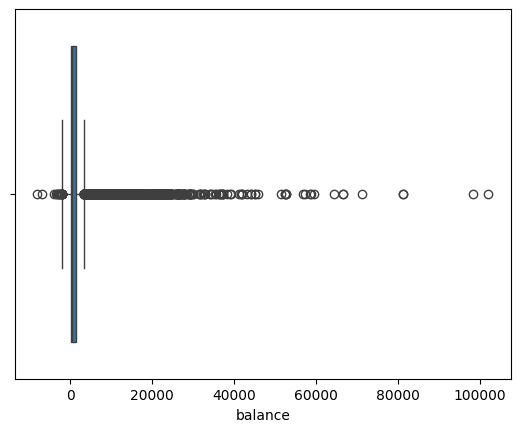

In [24]:
# Handling Outliers & Outlier treatments
sns.boxplot(x=df['balance'])
plt.show()
for col in ['age', 'balance', 'duration']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower, df[col]))

##### What all outlier treatment techniques have you used and why did you use those techniques?

I used IQR-Based Capping because

1.IQR is robust to skewed distributions and doesn’t assume normality.

2.Unlike removing outliers, capping retains all data points and avoids information loss.

3.Extreme values can dominate gradients or distances (especially in models like logistic regression, KNN).

4.Easy to interpret and fast to implement with minimal assumptions.

### 3. Categorical Encoding

In [25]:
# Encode your categorical columns
# Binary encoding
df['default'] = df['default'].map({'yes': 1, 'no': 0})
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})
df['y'] = df['y'].map({'yes': 1, 'no': 0})
# One-hot encode remaining categorical columns
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'], drop_first=True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

I used Binary Encoding (Manual Mapping) on columns like default,housing,loan,y as Binary encoding is simple, efficient, and avoids dimensionality explosion and it helps the model treat "yes" as 1 and "no" as 0, which is directly interpretable and memory-efficient.

Then, I used One-Hot Encoding on columns like job, marital, education, contact, month, poutcome as it

->creates independent binary columns for each category,

->ensures no implicit ordering is learned by the model (unlike label encoding),

->drop_first=True is used to avoid dummy variable trap (multicollinearity).



### 4. Feature Manipulation & Selection

In [26]:
# Manipulate Features to minimize feature correlation and create new features
df.drop('duration', axis=1, inplace=True)
# Create binary feature: was_contacted_before
df['was_contacted_before'] = np.where((df['pdays'] != -1) & (df['previous'] > 0), 1, 0)

### 6. Data Scaling

In [27]:
# Scaling your data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = ['age', 'balance', 'campaign', 'day']
df[num_cols] = scaler.fit_transform(df[num_cols])

##### Which method have you used to scale you data and why?

Ive used Standardization (StandardScaler) method because Helps ML models converge faster and prevents features with large magnitudes (like balance) from dominating those with smaller ones (like age).

### 8. Data Splitting

In [28]:
# Split your data to train and test. Choose Splitting ratio wisely.
df = pd.read_csv('/content/drive/MyDrive/data/Copy of bank-full.csv', sep=';', quotechar='"')
from sklearn.model_selection import train_test_split

X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print(f"Train set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))


Train set size: 36168
Test set size: 9043
y
no     0.883018
yes    0.116982
Name: proportion, dtype: float64
y
no     0.883003
yes    0.116997
Name: proportion, dtype: float64


##### What data splitting ratio have you used and why?

I've used 80:20 (80% of the data used for training the model,20% of the data used for testing) Splitting Ratio because 80:20 is a widely accepted default for most ML problems — balances training and evaluation.

->80% gives the model enough examples to learn patterns without underfitting.

->20% held out ensures realistic performance estimation on unseen data.

## ***7. ML Model Implementation***

### ML Model - 1

In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical_cols = [col for col in X_train.columns if col not in categorical_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])
# Fit and transform training data
X_train_enc = preprocessor.fit_transform(X_train)
# Transform test data
X_test_enc = preprocessor.transform(X_test)

In [30]:
# ML Model - 1 Implementing Logistics Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
logreg = LogisticRegression(max_iter=1000, random_state=42)
# Fit the Algorithm
logreg.fit(X_train_enc, y_train)
# Predict on the model
y_pred_logreg = logreg.predict(X_test_enc)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))
print("Accuracy Score:", accuracy_score(y_test, y_pred_logreg))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
 [[7775  210]
 [ 685  373]]

Classification Report:
               precision    recall  f1-score   support

          no       0.92      0.97      0.95      7985
         yes       0.64      0.35      0.45      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043

Accuracy Score: 0.9010284197721995


### ML Model - 2

In [31]:
# ML Model - 2 Random Forest Classifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# 1. Define categorical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
                    'loan', 'contact', 'month', 'poutcome']
# 2. Create ColumnTransformer with OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Keep numeric columns as-is
)
# 3. Fit and transform
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)
# 4. Initialize and train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_encoded, y_train)
# 5. Predict and evaluate
y_pred_rf = rf_model.predict(X_test_encoded)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))


Confusion Matrix:
 [[7774  211]
 [ 630  428]]

Classification Report:
               precision    recall  f1-score   support

          no       0.93      0.97      0.95      7985
         yes       0.67      0.40      0.50      1058

    accuracy                           0.91      9043
   macro avg       0.80      0.69      0.73      9043
weighted avg       0.90      0.91      0.90      9043

Accuracy Score: 0.9069998894172288


### ML Model - 3

In [38]:
# ML Model - 3 XGBoost
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# 1. Encode target labels from 'no'/'yes' to 0/1
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)
# 2. One-Hot encode categorical features
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)
X_train_enc = column_transformer.fit_transform(X_train)
X_test_enc = column_transformer.transform(X_test)
# 3. Train XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_enc, y_train_enc)
# 4. Predict & Evaluate
y_pred_xgb = xgb_model.predict(X_test_enc)
print("Confusion Matrix:\n", confusion_matrix(y_test_enc, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test_enc, y_pred_xgb))
print("Accuracy Score:", accuracy_score(y_test_enc, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:14:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix:
 [[7680  305]
 [ 541  517]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      7985
           1       0.63      0.49      0.55      1058

    accuracy                           0.91      9043
   macro avg       0.78      0.73      0.75      9043
weighted avg       0.90      0.91      0.90      9043

Accuracy Score: 0.9064469755612076


#### 2. Cross- Validation & Hyperparameter Tuning

In [34]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [1, 3, 5],
    'scale_pos_weight': [1, 5, 10]
}
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring='f1',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
# Fit the Algorithm
random_search.fit(X_train_enc, y_train_enc)
# Predict on the model
print("Best Parameters:", random_search.best_params_)
best_xgb = random_search.best_estimator_
y_pred_best = best_xgb.predict(X_test_enc)
print("Confusion Matrix:\n", confusion_matrix(y_test_enc, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test_enc, y_pred_best))
print("Accuracy Score:", accuracy_score(y_test_enc, y_pred_best))


Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:11:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 6, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Confusion Matrix:
 [[7178  807]
 [ 212  846]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93      7985
           1       0.51      0.80      0.62      1058

    accuracy                           0.89      9043
   macro avg       0.74      0.85      0.78      9043
weighted avg       0.92      0.89      0.90      9043

Accuracy Score: 0.887316156142873


##### Which hyperparameter optimization technique have you used and why?

 I used RandomizedSearchCV for hyperparameter optimization because Unlike GridSearchCV, which exhaustively tries every combination in a parameter grid, RandomizedSearchCV samples a fixed number of random combinations from the parameter space. This makes it much faster and computationally more efficient, especially when you have many hyperparameters with multiple possible values.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The accuracy decreased because accuracy is influenced heavily by the majority class (class 0 "no") because it dominates the dataset.

My tuned model boosted recall for the minority class ("yes") from 0.49 to 0.80 so it now detects more positives.This causes overall accuracy to drop because a higher number of negatives are misclassified.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

for evaluation metrics I considered

1.Accuracy to measure overall correctness

2.Precision to know out of all customers we predicted would say “yes”, how many actually did?

3.Recall to know out of all actual “yes” customers, how many did we catch?

4.F1-score to combine precision and recall

5.Confusion Matrix to provide a clear picture of how many customers were correctly/incorrectly classified in each class.

6.Macro Avg / Weighted Avg F1 to summarize performance across both classes and detect model bias toward the majority class.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I chose XGBoost as my final prediction model because it achieved the highest recall and F1-score for the minority class ("yes"), meaning it captures far more actual positive responses.

Though it has a slightly lower accuracy, this is acceptable because accuracy is misleading on imbalanced datasets.

# **Conclusion**

In this project, we successfully developed and evaluated multiple machine learning models to predict whether a customer would subscribe to a term deposit based on their demographic and campaign-related features.

We began by applying three classification models — Logistic Regression, Random Forest, and XGBoost — and compared their performance using key evaluation metrics such as precision, recall, F1-score, and confusion matrix. Given the class imbalance in the dataset (more "no" responses than "yes"), we focused primarily on metrics that reflect the model’s ability to correctly identify the minority class (“yes”).

Among all the models tested, the tuned XGBoost classifier emerged as the most effective. Although it resulted in a slight decrease in overall accuracy, it achieved a significantly higher recall (0.80) and F1-score (0.62) for the positive class, which is crucial in a business context where identifying potential customers can lead to direct revenue generation.